# Análise Exploratória de Dados (EDA) do Conjunto de Dados de Diabetes

## Introdução
Neste projeto, buscamos entender mais sobre o algoritmo `RandomForestClassifier` e seus usos para previsões de variáveis dicotômicas. Para uma análise exploratória inicial, utilizamos ferramentas como `pandas` para manipulação de dados e `scipy` para cálculos estatísticos.

## Importação de Bibliotecas e Carregamento de Dados

In [18]:
import pandas as pd
data = pd.read_csv('D:/project_hub/Predição de Pacientes com Diabetes/input/diabetes_dataset.csv')
import sys
sys.path.append('d:/project_hub/Predição de Pacientes com Diabetes')
from utils.eda_utils import *

Aqui estamos usando a função analysis_plots, presente na ../code/eda_utils.py, para ver a distribuição dos dados e perceber o perfil dos nossos dados.
Distribuições: A maioria das variáveis apresenta assimetria, com destaque para "Espessura da Pele" e "Insulina" que possuem muitos valores zero, possivelmente indicando dados faltantes. A variável "Diabético" está desbalanceada, com mais casos negativos, mas não necessáriamente indicando uma desordem.
Outliers: Foram identificados possíveis valores discrepantes em diversas variáveis, principalmente em "Glicose" e "Pressão Sanguínea", que serão exploradas com mais profundidade.
Valores faltantes: A possível ausência de dados é um problema recorrente, especialmente em "Espessura da Pele" e "Insulina".

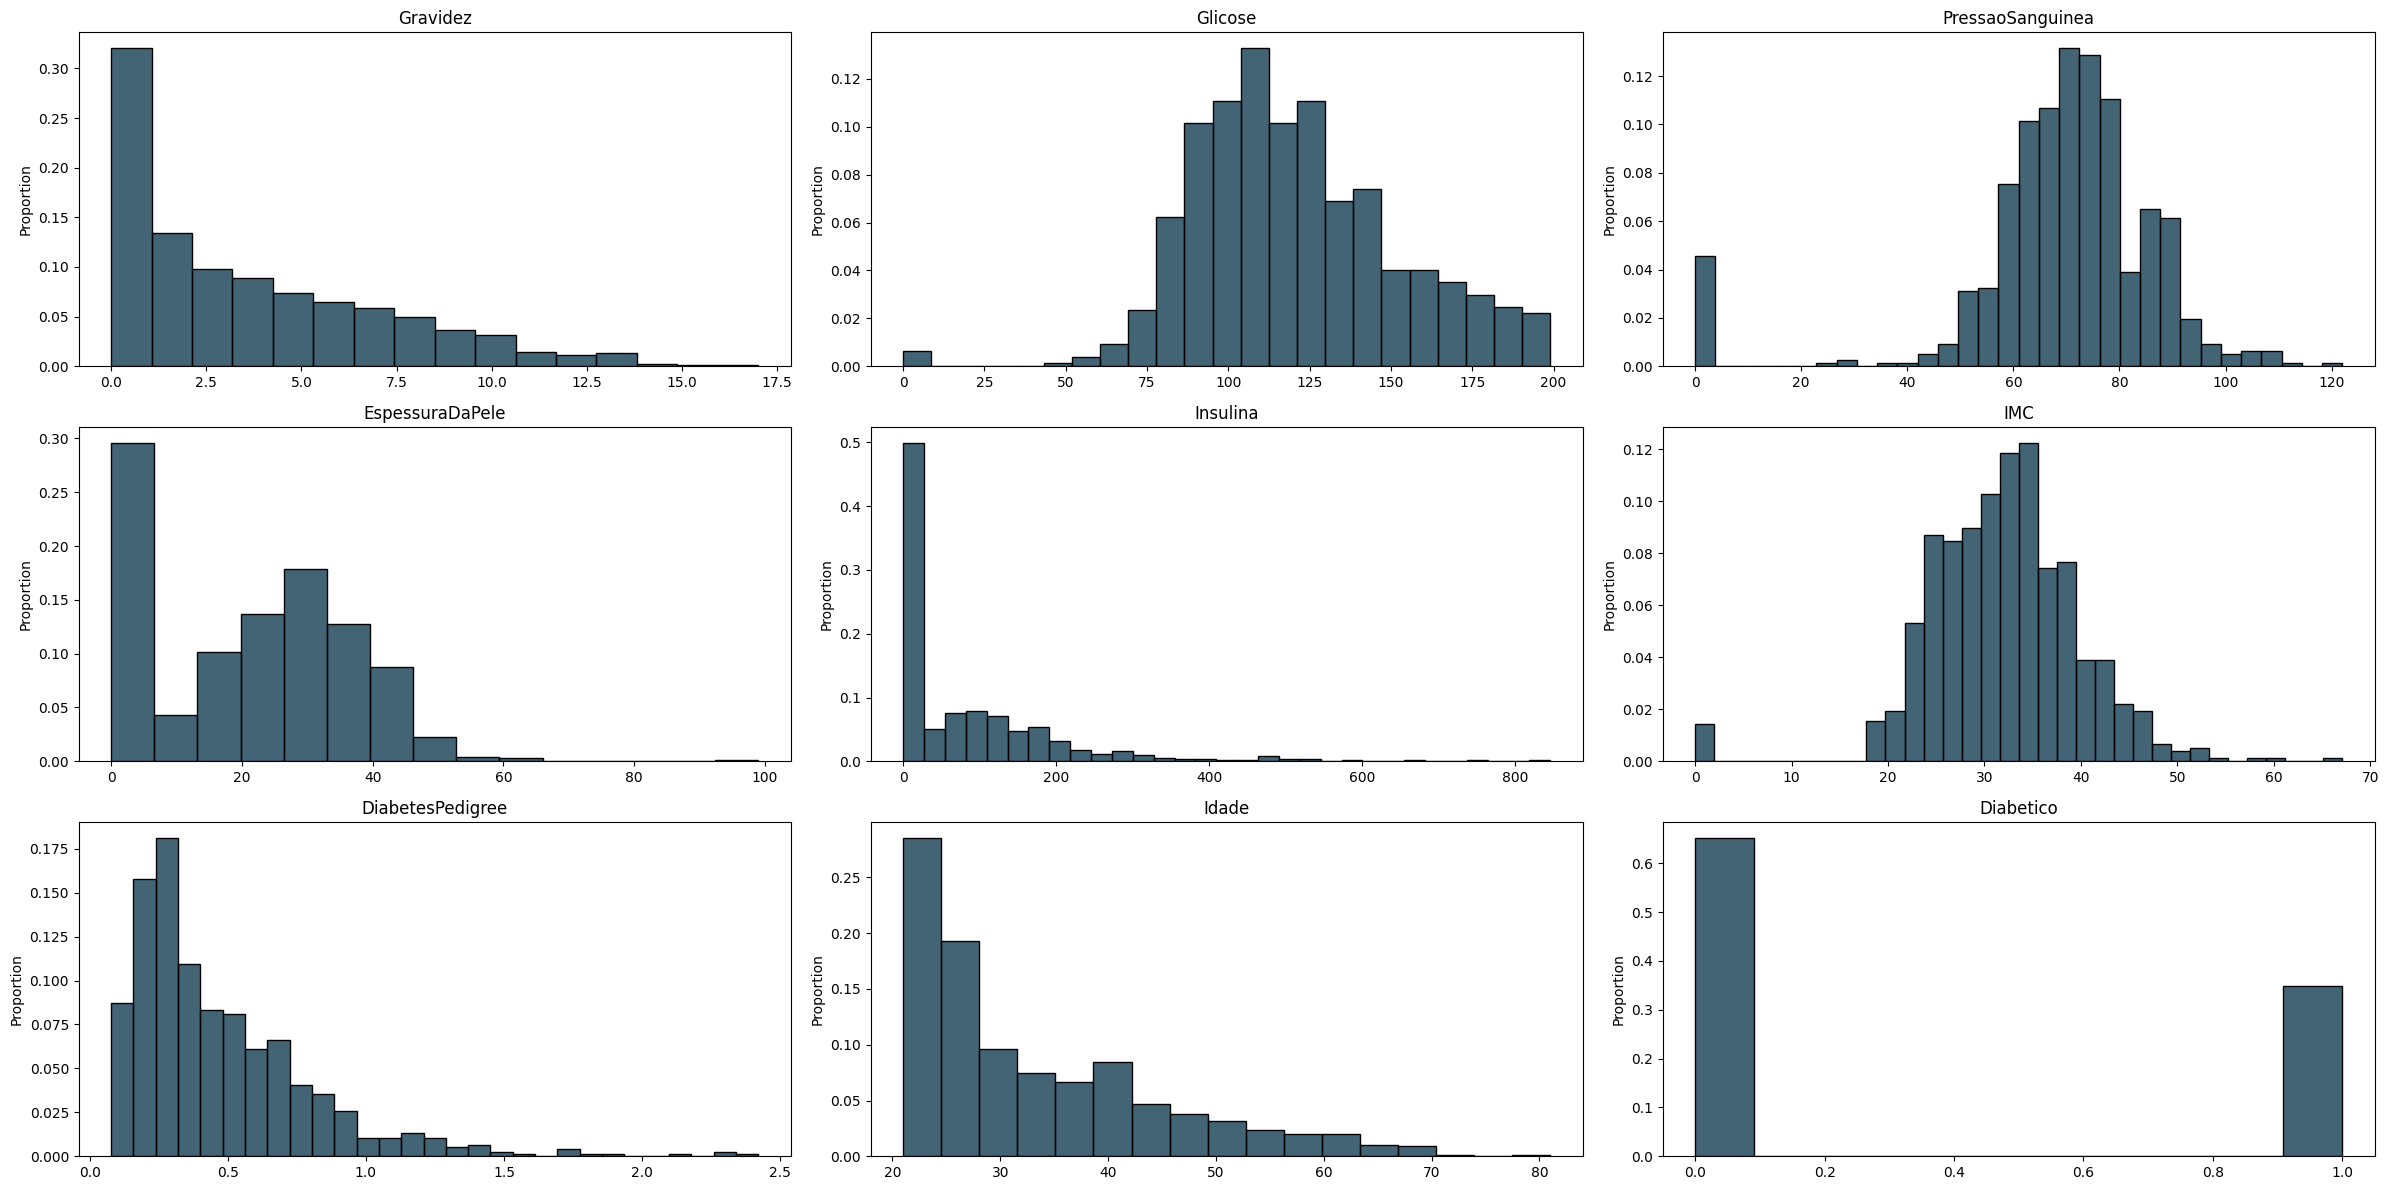

In [19]:
analysis_plots(data, features=data.columns)

### Observações:
- **Distribuições**: A maioria das variáveis apresenta assimetria, com destaque para "Espessura da Pele" e "Insulina", que possuem muitos valores zero, possivelmente indicando dados faltantes.
- **Outliers**: Valores discrepantes foram identificados em variáveis como "Glicose" e "Pressão Sanguínea".
- **Valores Faltantes**: A ausência de dados é um problema recorrente, especialmente em "Espessura da Pele" e "Insulina".

## Informações e Estatísticas Descritivas
Para entender melhor o conjunto de dados, exibimos informações gerais e estatísticas descritivas.


In [20]:
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gravidez          768 non-null    int64  
 1   Glicose           768 non-null    int64  
 2   PressaoSanguinea  768 non-null    int64  
 3   EspessuraDaPele   768 non-null    int64  
 4   Insulina          768 non-null    int64  
 5   IMC               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Idade             768 non-null    int64  
 8   Diabetico         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,count,mean,std,min,25%,50%,75%,max
Gravidez,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glicose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
PressaoSanguinea,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
EspessuraDaPele,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulina,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
IMC,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Idade,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetico,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Análise:
- **`data.info()`**: Fornece um resumo conciso do DataFrame, incluindo o número de entradas, tipos de dados e valores não nulos.
- **`data.describe().T`**: Gera estatísticas descritivas para as variáveis numéricas, como média, desvio padrão, mínimo e máximo.

## Teste de Hipóteses
Para determinar quais variáveis têm um impacto significativo na presença de diabetes, realizamos testes t.


In [21]:
import scipy.stats as stats

grupo_com_diabetes = data[data['Diabetico'] == 1]
grupo_sem_diabetes = data[data['Diabetico'] == 0]

sem_diabetes = data.drop(columns=["Diabetico"])
variaveis = sem_diabetes.columns

for variavel in variaveis:
    dados_grupo_com_diabetes = grupo_com_diabetes[variavel]
    dados_grupo_sem_diabetes = grupo_sem_diabetes[variavel]

    t_statistic, p_value = stats.ttest_ind(dados_grupo_com_diabetes, dados_grupo_sem_diabetes)

    print(f"Variável: {variavel}")
    print(f"Estatística t: {t_statistic}")
    print(f"Valor-p: {p_value:.10f}")

Variável: Gravidez
Estatística t: 6.298430550035151
Valor-p: 0.0000000005
Variável: Glicose
Estatística t: 14.600060005973894
Valor-p: 0.0000000000
Variável: PressaoSanguinea
Estatística t: 1.8047023017353887
Valor-p: 0.0715139001
Variável: EspessuraDaPele
Estatística t: 2.0747001964159613
Valor-p: 0.0383477048
Variável: Insulina
Estatística t: 3.64432538765356
Valor-p: 0.0002861865
Variável: IMC
Estatística t: 8.47183994786525
Valor-p: 0.0000000000
Variável: DiabetesPedigree
Estatística t: 4.88582646072744
Valor-p: 0.0000012546
Variável: Idade
Estatística t: 6.792688071649956
Valor-p: 0.0000000000


### Interpretação:
- **Estatística t**: Indica a diferença entre as médias dos dois grupos.
- **Valor-p**: Um valor-p baixo (geralmente < 0.05) sugere que a variável tem um impacto significativo na presença de diabetes.

## Remoção de Variáveis Irrelevantes
Com base nos resultados dos testes, decidimos remover variáveis que não apresentaram relação significativa com a variável alvo.


In [22]:
data = data.drop(columns=["EspessuraDaPele", "PressaoSanguinea"])
#data.to_csv('diabetes.csv', index=False)

### Justificativa:
As colunas `EspessuraDaPele` e `PressaoSanguinea` foram removidas devido ao alto p-valor, indicando que não contribuem para a previsão da diabetes.

## Análise de Outliers
A identificação de outliers é fundamental, pois eles podem distorcer a análise e os resultados do modelo.


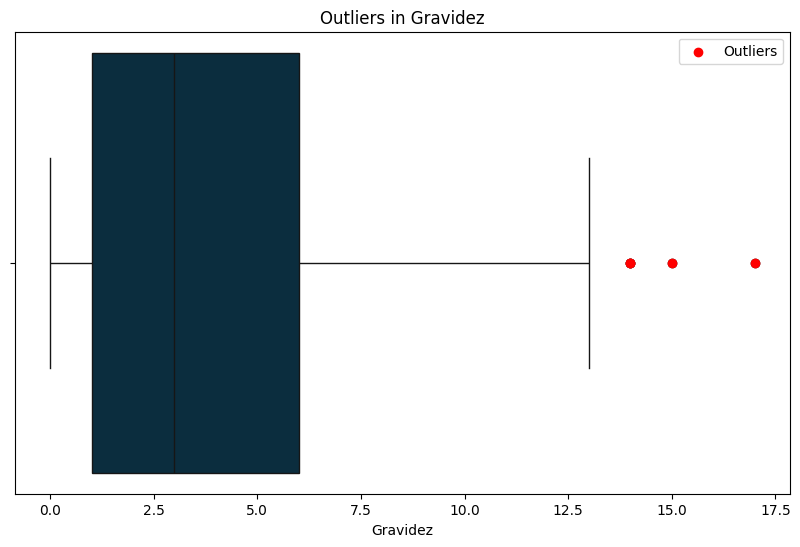

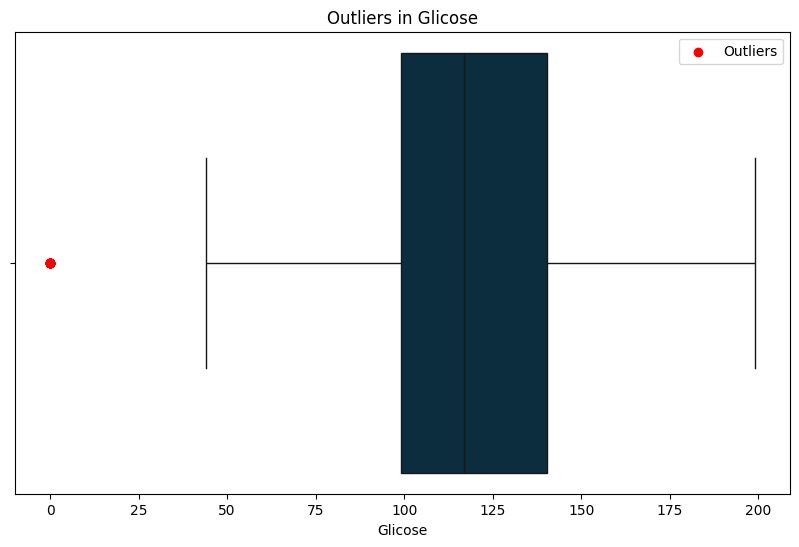

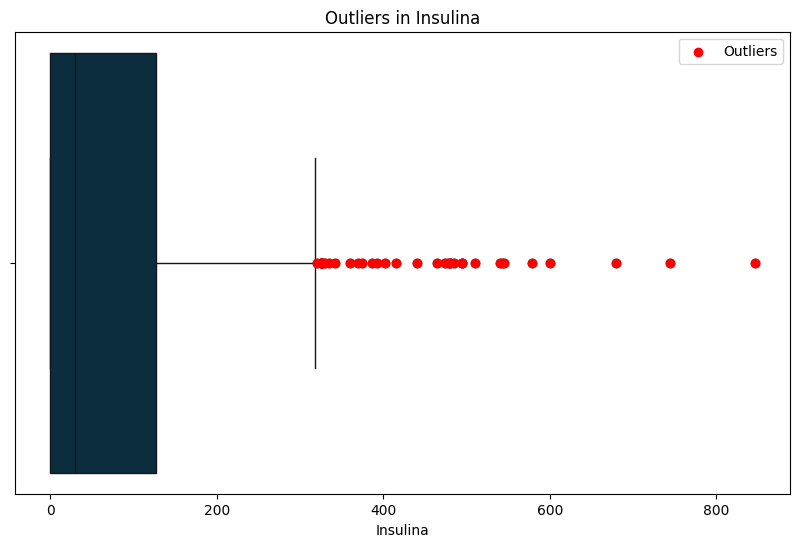

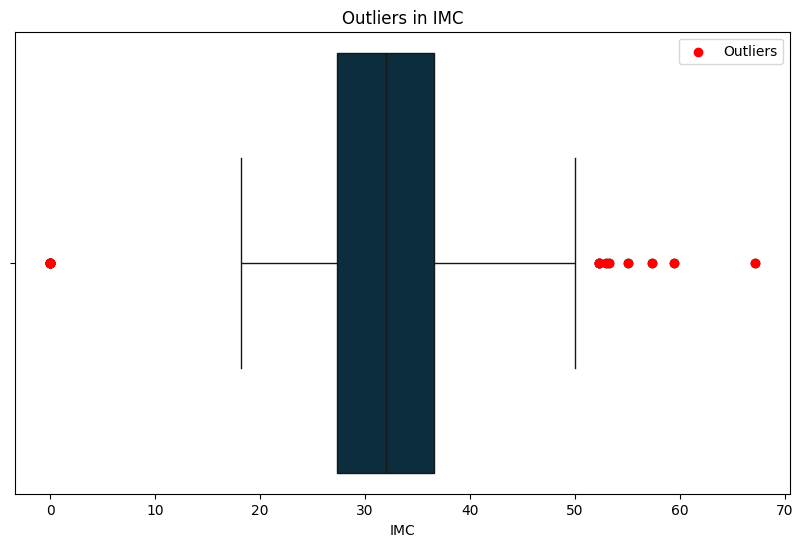

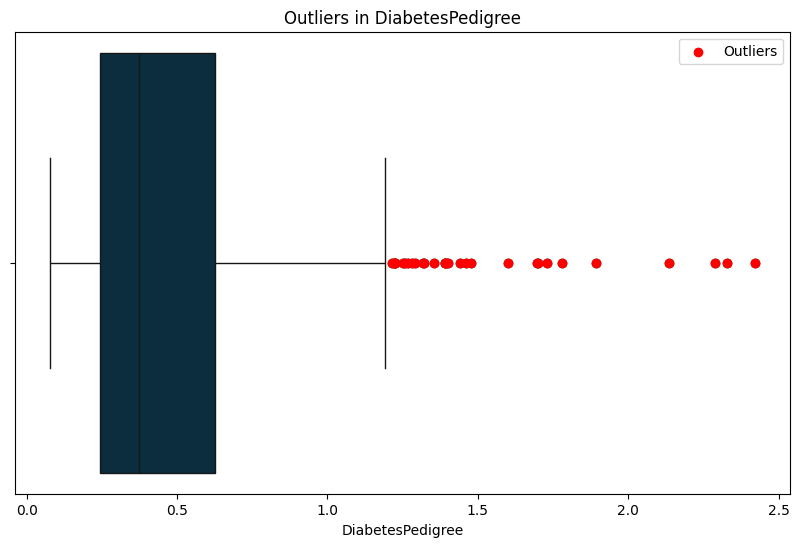

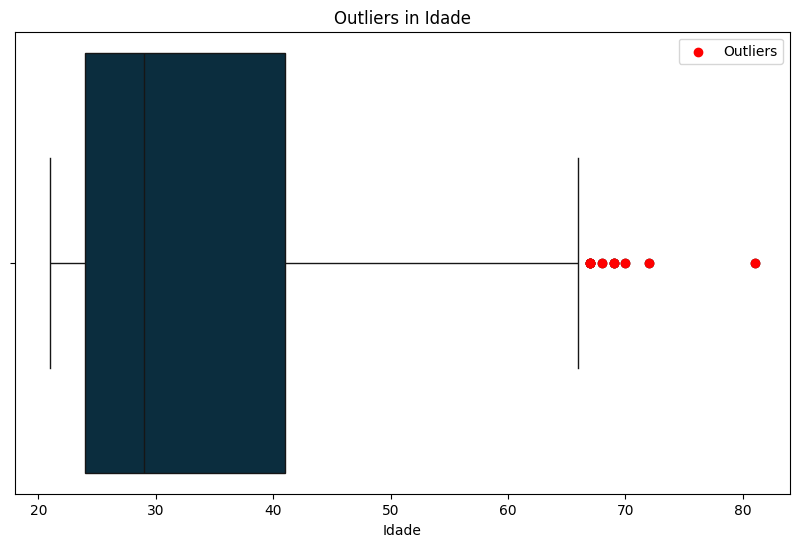

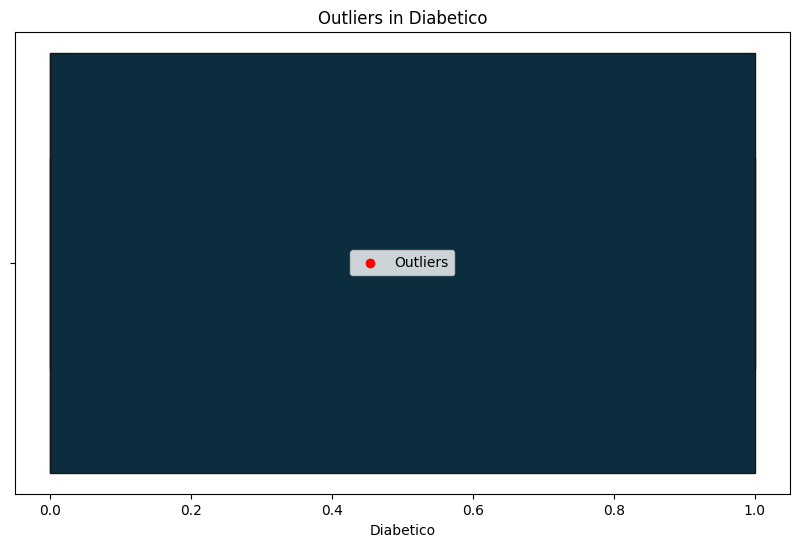

There are 100 outliers in the dataset.

Number (percentage) of outliers per feature: 

Gravidez: 4 (0.52)%
Glicose: 5 (0.65)%
Insulina: 34 (4.43)%
IMC: 19 (2.47)%
DiabetesPedigree: 29 (3.78)%
Idade: 9 (1.17)%
Diabetico: 0 (0.0)%


({'Gravidez': [88, 159, 298, 455],
  'Glicose': [75, 182, 342, 349, 502],
  'Insulina': [8,
   13,
   54,
   111,
   139,
   153,
   186,
   220,
   228,
   231,
   247,
   248,
   258,
   286,
   296,
   360,
   370,
   375,
   392,
   409,
   415,
   480,
   486,
   519,
   574,
   584,
   612,
   645,
   655,
   695,
   707,
   710,
   715,
   753],
  'IMC': [9,
   49,
   60,
   81,
   120,
   125,
   145,
   177,
   193,
   247,
   303,
   371,
   426,
   445,
   494,
   522,
   673,
   684,
   706],
  'DiabetesPedigree': [4,
   12,
   39,
   45,
   58,
   100,
   147,
   187,
   218,
   228,
   243,
   245,
   259,
   292,
   308,
   330,
   370,
   371,
   383,
   395,
   445,
   534,
   593,
   606,
   618,
   621,
   622,
   659,
   661],
  'Idade': [123, 363, 453, 459, 489, 537, 666, 674, 684],
  'Diabetico': []},
 {'Gravidez': 4,
  'Glicose': 5,
  'Insulina': 34,
  'IMC': 19,
  'DiabetesPedigree': 29,
  'Idade': 9,
  'Diabetico': 0},
 100)

In [23]:
check_outliers(data, features=data.columns, visualize= True)

### Resultados:
- A função `check_outliers` gera gráficos que ajudam a visualizar a presença de outliers em diversas variáveis.

## Cálculo do IQR e Remoção de Outliers
Utilizamos o método do intervalo interquartil (IQR) para identificar e remover outliers do conjunto de dados.


In [24]:
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove("Diabetico")
numeric_data = data[numeric_cols]

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)

outliers_df = data[outliers]
outliers_df.to_csv("D:/project_hub/Predição de Pacientes com Diabetes/src/outliers.csv", index=False)

data_sem_outliers = data[~outliers]

data_sem_outliers.to_csv("D:/project_hub/Predição de Pacientes com Diabetes/src/diabetes_input.csv", index=False) #csv do modelo

### Conclusão:

## Considerações Finais
